In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pi_vertical_garden.util as pvg
from pi_vertical_garden.util import *
import pandas as pd

In [15]:
ndb = '../data.sqlite'

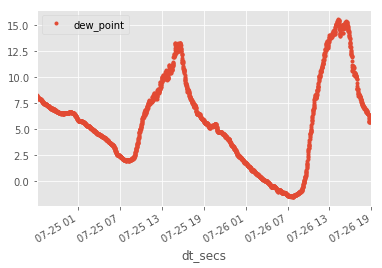

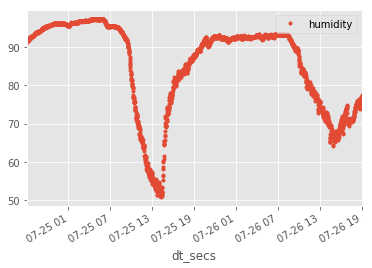

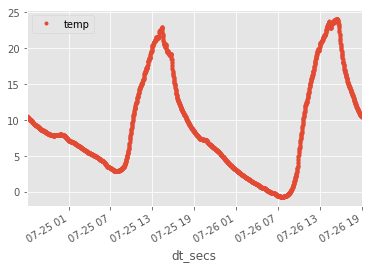

In [17]:
plot_cols(ndb,last=48*3600)

In [15]:
pvg.valve_on()

In [64]:
ds = pvg.get_soil_data(ndb)

In [68]:
ds.index = ds.index-(3600*4)

In [78]:
con = sq3.connect(ndb)

In [79]:
query = 'update {0} set {1}={1}-(3600*1)'.format(SOIL_DATA_TB_NAME,COL_DT_SECS)

In [80]:
query

'update soil_data set dt_secs=dt_secs-(3600*1)'

In [81]:
cursor = con.cursor()

In [82]:
cursor.execute(query)

In [83]:
con.commit()

In [84]:
con.close()

In [8]:
from pprint import pformat

In [9]:
logger.debug(pformat('sdf'))

2019-07-23 12:01:33,079 pvg          DEBUG    'sdf'


In [18]:
query = """
select * from 

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-18-6c258b8a4618>, line 2)

In [ ]:
def get_soil_data(db=DB,last=10**9):
    now = get_now_unix()
    last_unix = now-last
    query = '''
        select avg({col_dt}) {col_dt},
        
        from {tb} 
        where {col_dt}>{last_unix}
        group by round({col_dt}*{round})
    '''
    dic = {
        'tb':SOIL_DATA_TB_NAME,
        'col_dt':COL_DT_SECS,
        'last_unix':last_unix
    }
    with sq3.connect(db) as con:
        df = pd.read_sql(query, con, index_col=COL_DT_SECS)
    return df